In [1]:
import sys
sys.path.append('../')
from helper import *

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

runs = pd.read_pickle("../Data/main_1.df")

TARGET = "won"
    
thresh = bestOddsEval(runs, TARGET)
thresh_test = bestOddsEval(runs[int(len(runs) * 0.8):], TARGET)

In [7]:
feat_1 = ["horse_no", "horse_age", "horse_rating", "declared_weight", "actual_weight", 
            "win_odds", "draw", "race_size", "distance", "race_class", 
            'last_race_result','win_percent', 
            'avg_distance_time', 'normal_avg_distance_time',
            'going_type_record', 'actual_weight_scaled',
            'declared_weight_scaled', 'horse_race_count', "jockey_record",
            'trainer_record', 'horse_record', 'surface_record', 'place_odds',
            'weight_change', 'weight_change_over_time','weight_change_from_average', 'weight_change_increase',
            'venue_change','venue_record', 'days_since_last_race', 'new_horse',
            'best_odds', 'best_win_percent', 'best_distance_time', 'best_going_record', 
            'best_horse_record', 'best_jockey_record','best_trainer_record', 'highest_actual_weight', 
            'lowest_actual_weight', 'start_speed', 'rode_before',
           'horse_type_Brown',
           'horse_type_Colt', 'horse_type_Filly', 'horse_type_Gelding',
           'horse_type_Grey', 'horse_type_Horse', 'horse_type_Mare',
           'horse_type_Rig', 'horse_type_Roan', 'horse_country_ARG',
           'horse_country_AUS', 'horse_country_BRZ', 'horse_country_CAN',
           'horse_country_FR', 'horse_country_GB', 'horse_country_GER',
           'horse_country_GR', 'horse_country_IRE', 'horse_country_ITY',
           'horse_country_JPN', 'horse_country_NZ', 'horse_country_SAF',
           'horse_country_SPA', 'horse_country_USA', 'horse_country_ZIM',
          'going_type_fast', 'going_type_slow', 'going_type_wet'
           ]
feat_2 = ["horse_no", "horse_age", "horse_rating", "declared_weight", "actual_weight", 
            "draw", "race_size", "distance", "race_class", 
            'last_race_result','win_percent', 
            'avg_distance_time', 'normal_avg_distance_time',
            'going_type_record', 'actual_weight_scaled',
            'declared_weight_scaled', 'horse_race_count', "jockey_record",
            'trainer_record', 'horse_record', 'surface_record', 'place_odds',
            'weight_change', 'weight_change_over_time','weight_change_from_average', 'weight_change_increase',
            'venue_change','venue_record', 'days_since_last_race', 'new_horse',
             'best_win_percent', 'best_distance_time', 'best_going_record', 
            'best_horse_record', 'best_jockey_record','best_trainer_record', 'highest_actual_weight', 
            'lowest_actual_weight', 'start_speed', 'rode_before',
           'horse_type_Brown',
           'horse_type_Colt', 'horse_type_Filly', 'horse_type_Gelding',
           'horse_type_Grey', 'horse_type_Horse', 'horse_type_Mare',
           'horse_type_Rig', 'horse_type_Roan', 'horse_country_ARG',
           'horse_country_AUS', 'horse_country_BRZ', 'horse_country_CAN',
           'horse_country_FR', 'horse_country_GB', 'horse_country_GER',
           'horse_country_GR', 'horse_country_IRE', 'horse_country_ITY',
           'horse_country_JPN', 'horse_country_NZ', 'horse_country_SAF',
           'horse_country_SPA', 'horse_country_USA', 'horse_country_ZIM',
          'going_type_fast', 'going_type_slow', 'going_type_wet'
           ]

In [8]:
model = MLPClassifier(
        solver="adam",
        activation="identity",
        hidden_layer_sizes=(int(len(feat_2)/2)),
        alpha=0.002, 
        learning_rate="constant",
    )
scores_1, feats_1 = selectFeatures_k(model, runs, feat_2, TARGET)

k: 2/68
k: 3/68
k: 4/68
k: 5/68
k: 6/68
k: 7/68
k: 8/68
k: 9/68
k: 10/68
k: 11/68
k: 12/68
k: 13/68
k: 14/68
k: 15/68
k: 16/68
k: 17/68
k: 18/68
k: 19/68
k: 20/68
k: 21/68
k: 22/68
k: 23/68
k: 24/68
k: 25/68
k: 26/68
k: 27/68
k: 28/68
k: 29/68
k: 30/68
k: 31/68
k: 32/68
k: 33/68
k: 34/68
k: 35/68
k: 36/68
k: 37/68
k: 38/68
k: 39/68
k: 40/68
k: 41/68
k: 42/68
k: 43/68
k: 44/68
k: 45/68
k: 46/68
k: 47/68
k: 48/68
k: 49/68
k: 50/68
k: 51/68
k: 52/68
k: 53/68
k: 54/68
k: 55/68
k: 56/68
k: 57/68
k: 58/68
k: 59/68
k: 60/68
k: 61/68
k: 62/68
k: 63/68
k: 64/68
k: 65/68
k: 66/68
k: 67/68
k: 68/68


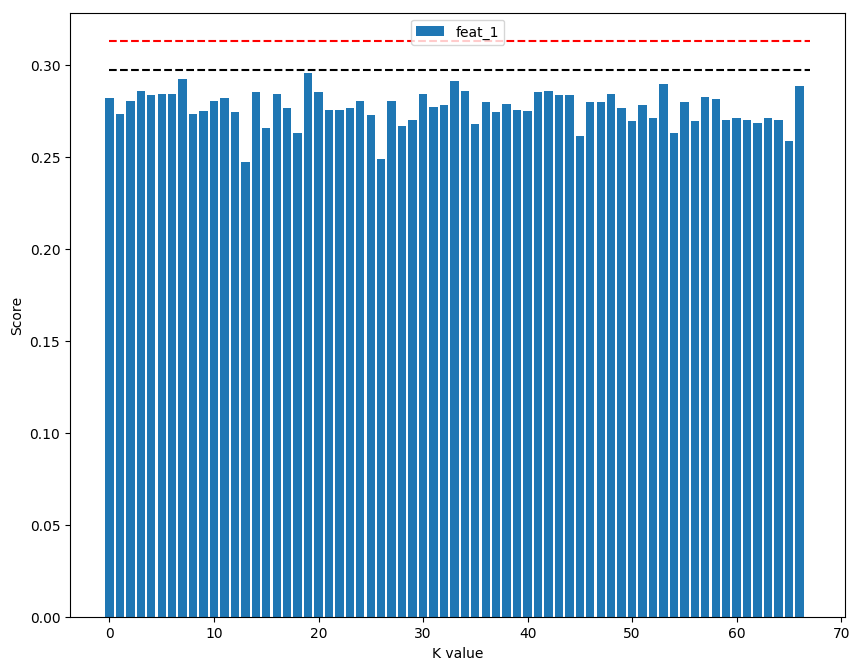

In [9]:
N_1 = len(feat_2)-1
ind_1 = np.arange(N_1)

plt.figure(figsize=(10,8), dpi=100)
plt.bar(ind_1, scores_1, label="feat_1")
plt.plot([0, N_1], [thresh,thresh], "k--")
plt.plot([0, N_1], [thresh_test,thresh_test], "r--")
plt.xlabel("K value")
plt.ylabel("Score")
plt.legend()

In [6]:
best_feat_1 = feats_1[np.argmax(scores_1, axis=0)]

print("Best feat_1 selection:")
print(best_feat_1)

Best feat_1 selection:
['horse_no', 'win_odds', 'draw', 'avg_distance_time', 'horse_race_count', 'place_odds', 'days_since_last_race', 'best_odds', 'best_win_percent', 'best_going_record', 'best_horse_record', 'best_jockey_record', 'best_trainer_record']
